<a href="https://colab.research.google.com/github/umerrock346/cv.repo.umer/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt


In [3]:
def computeNegativeImage(image):
  negImage =np.abs(image -255)
  return negImage


In [4]:
url="https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
image = io.imread(url)
image = np.array(image)
image = image.astype(np.uint8)

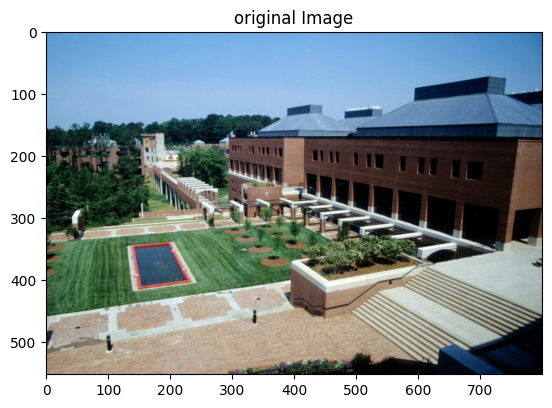

In [5]:
plt.imshow(image,cmap=plt.get_cmap('gray'))
plt.title('original Image')
plt.show()


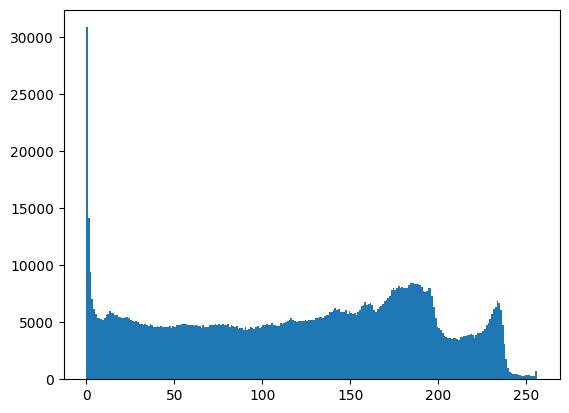

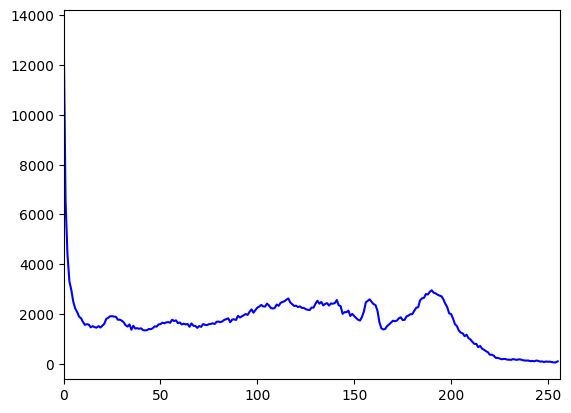

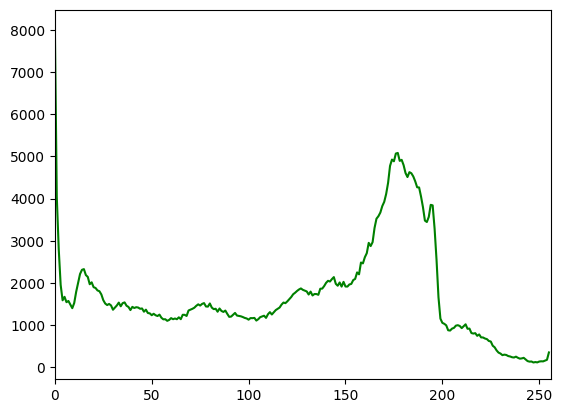

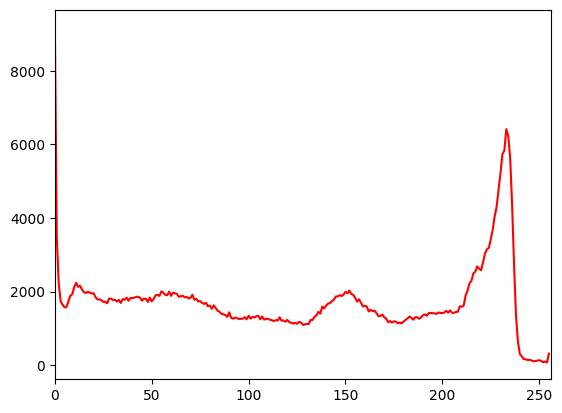

In [6]:
plt.hist(image.ravel(),256, range = [0,256])
plt.show()
color = ('b','g','r')
for i, col in enumerate(color):
  histr = cv.calcHist([image],[i],None,[256],[0,256])
  plt.plot(histr,color = col)
  plt.xlim([0,256])
  plt.show()



In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL.Image as Image
from skimage import io

In [8]:
url="https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg"
imge = io.imread(url) # open an image
#Convert the image file to a matrix
image = np.array(imge)

In [9]:
#checking type of image
print("The loaded image is of type:",type(image))
print("The loaded image is of size:",image.shape)
print("intensity at index", image[50][50])

The loaded image is of type: <class 'numpy.ndarray'>
The loaded image is of size: (552, 800, 3)
intensity at index [114 170 219]


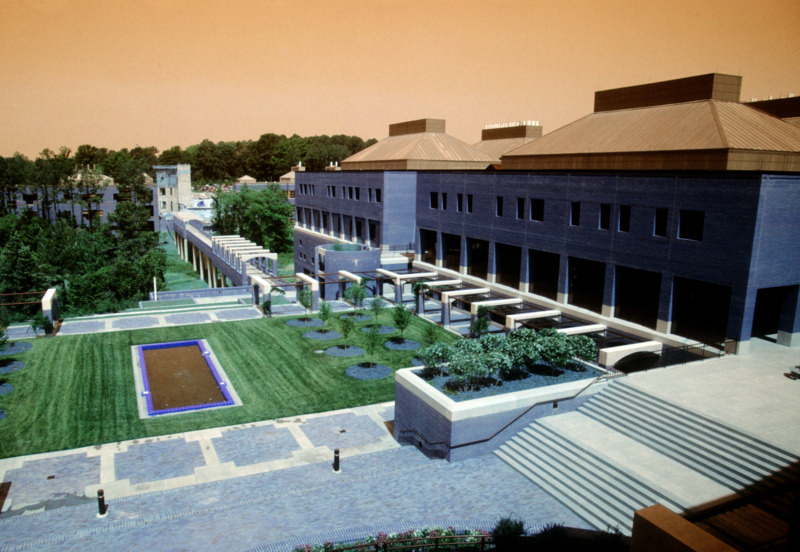

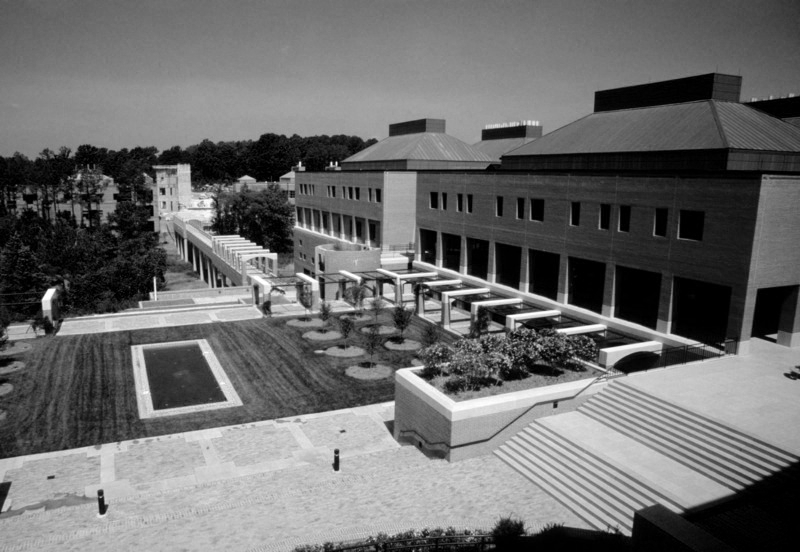

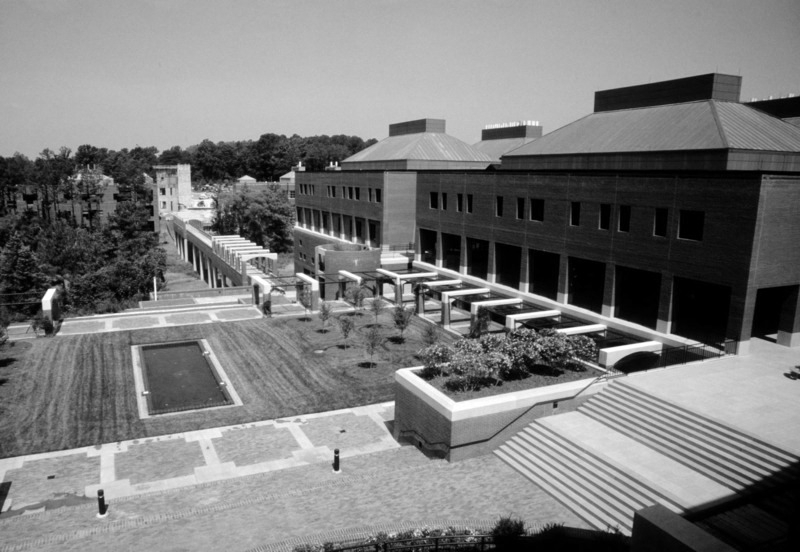

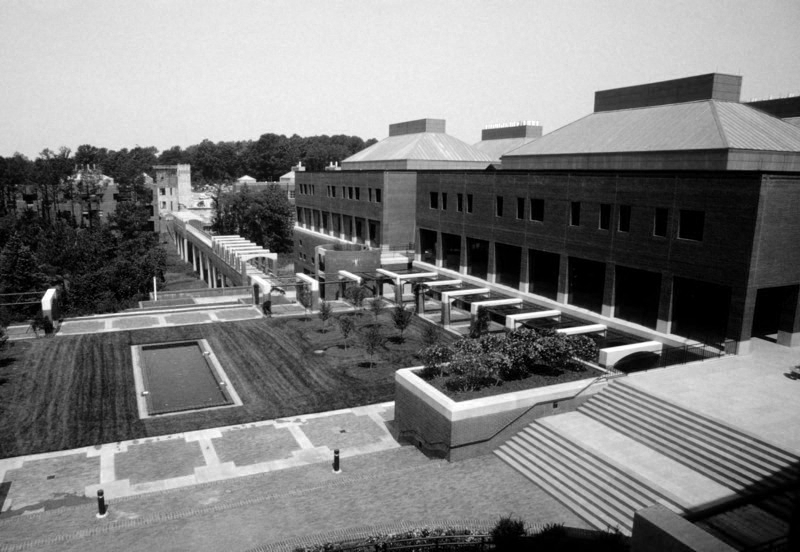

In [10]:
#separating each color. Note the order of colors
#or use split function, note that it is bgr and not rgb
B,G,R = cv.split(image)
cv2_imshow(image)
cv2_imshow(B)
cv2_imshow(G)
cv2_imshow(R)

In [12]:
import cv2


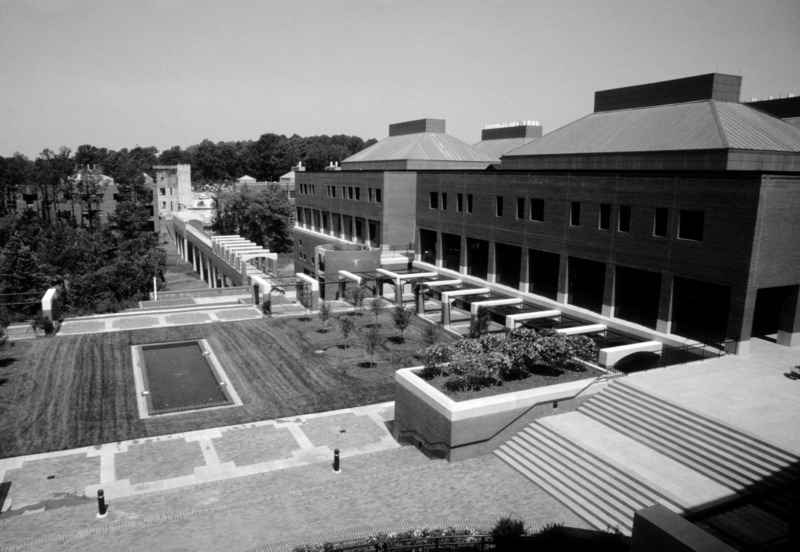

In [13]:
#Convering in grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

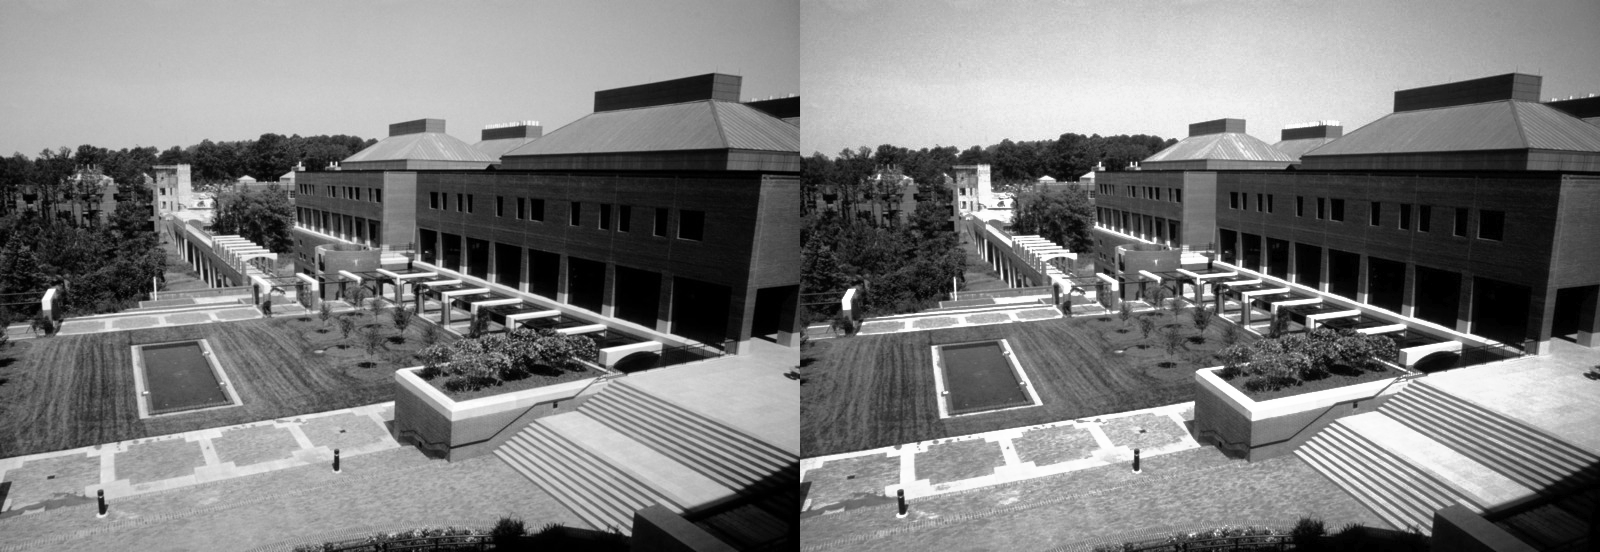

In [14]:
#Histogram Equalisation
output = cv2.equalizeHist(gray)
# show image input vs output
cv2_imshow(np.hstack([gray, output]))

Task 1: Read the intuition behind histogram equalisation

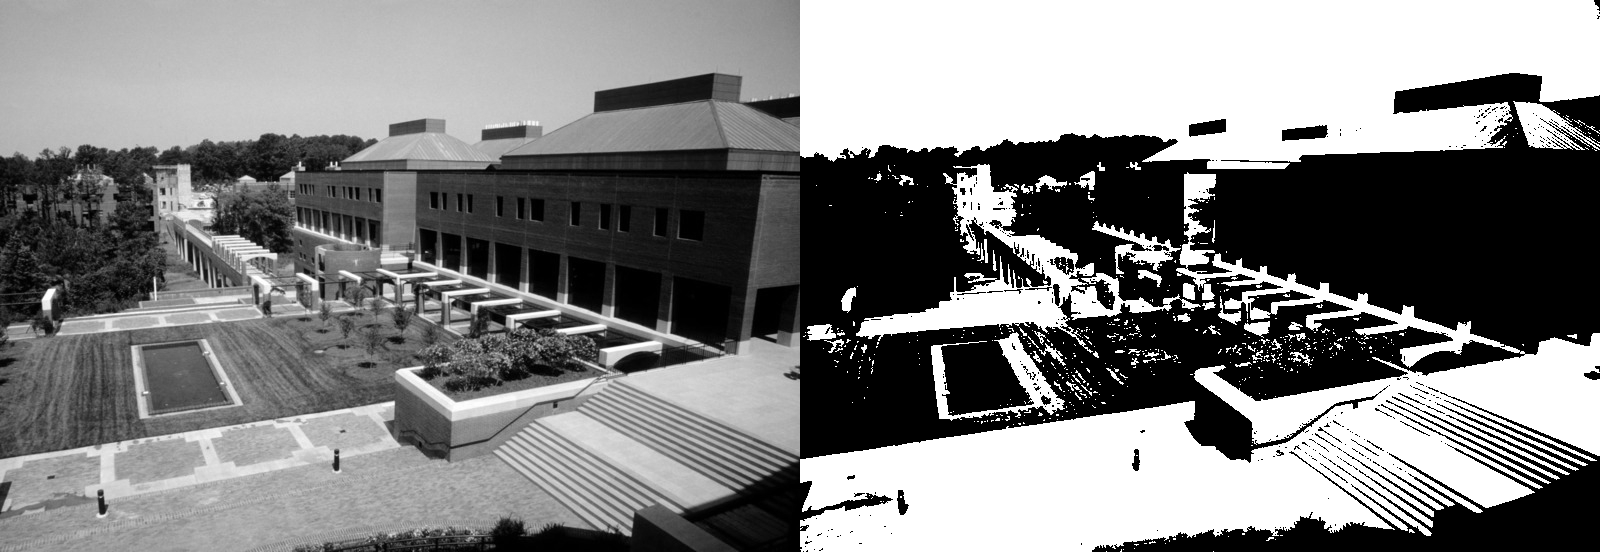

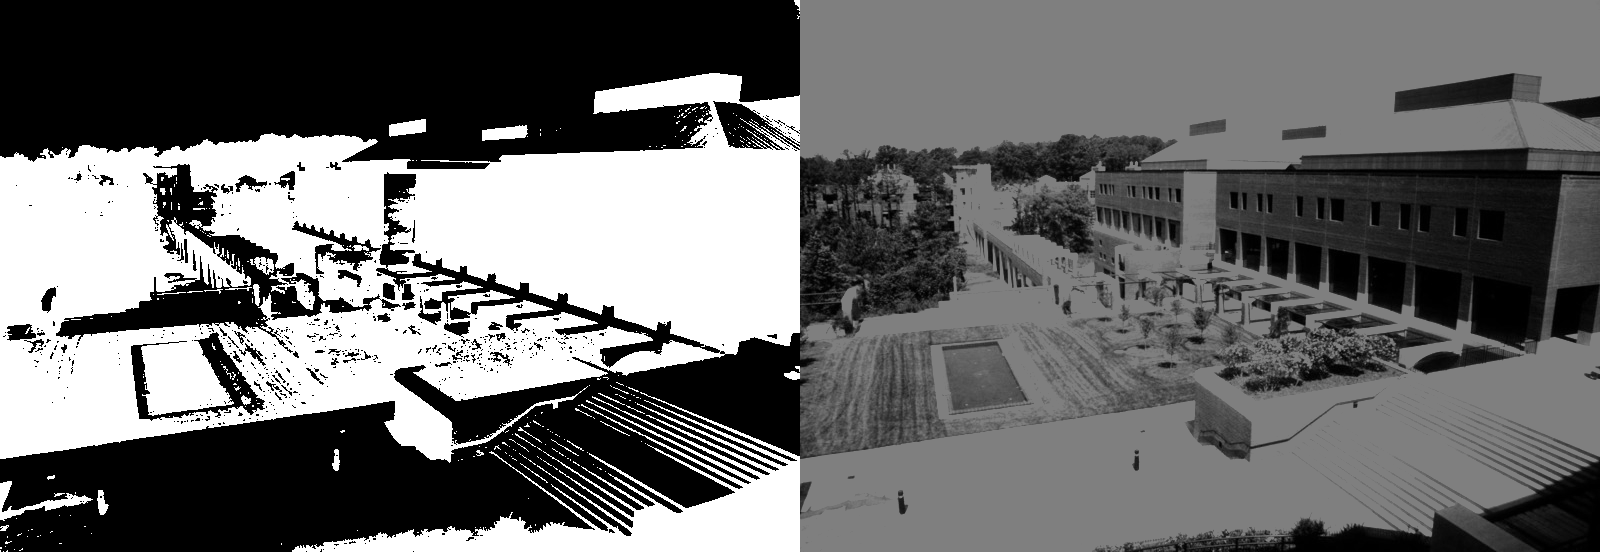

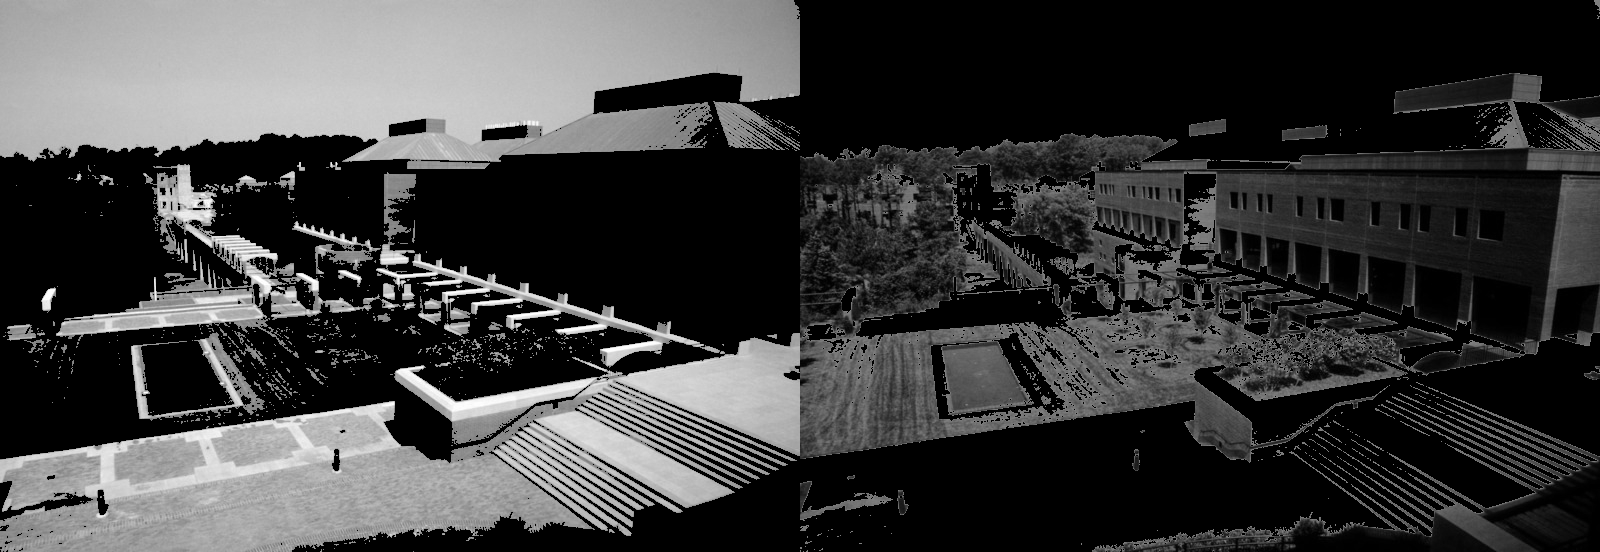

In [15]:
#Image Thresholding
#user defined thresholds
ret, thresh1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(gray, 127, 255, cv2.THRESH_TOZERO_INV)
#displaying the threshold images
cv2_imshow(np.hstack([gray, thresh1]))
cv2_imshow(np.hstack([thresh2, thresh3]))
cv2_imshow(np.hstack([thresh4, thresh5]))

Task 2: Investigate the difference between thresholding methods

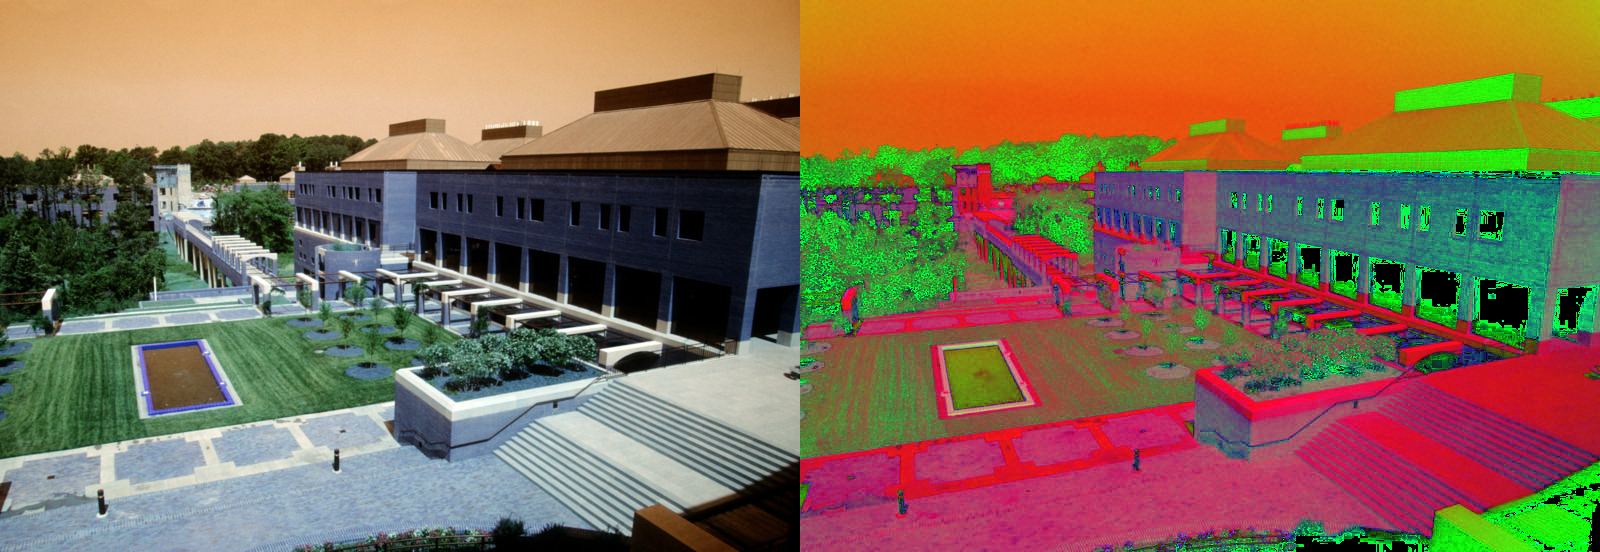

In [17]:
#HSV colorspace
#Converting in hsv
# COLOR_<current format>2<new format> 2 is just a separator
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#hsv value for white is 0,0,255 - h is zero by default for white, saturation is zero bcz we don't want
#any color in that
#value is max i.e 255
#showing the image and hsv
cv2_imshow(np.hstack([image, hsv]))

Task 3: Explore different color spaces i.e. yCbCr and Lab

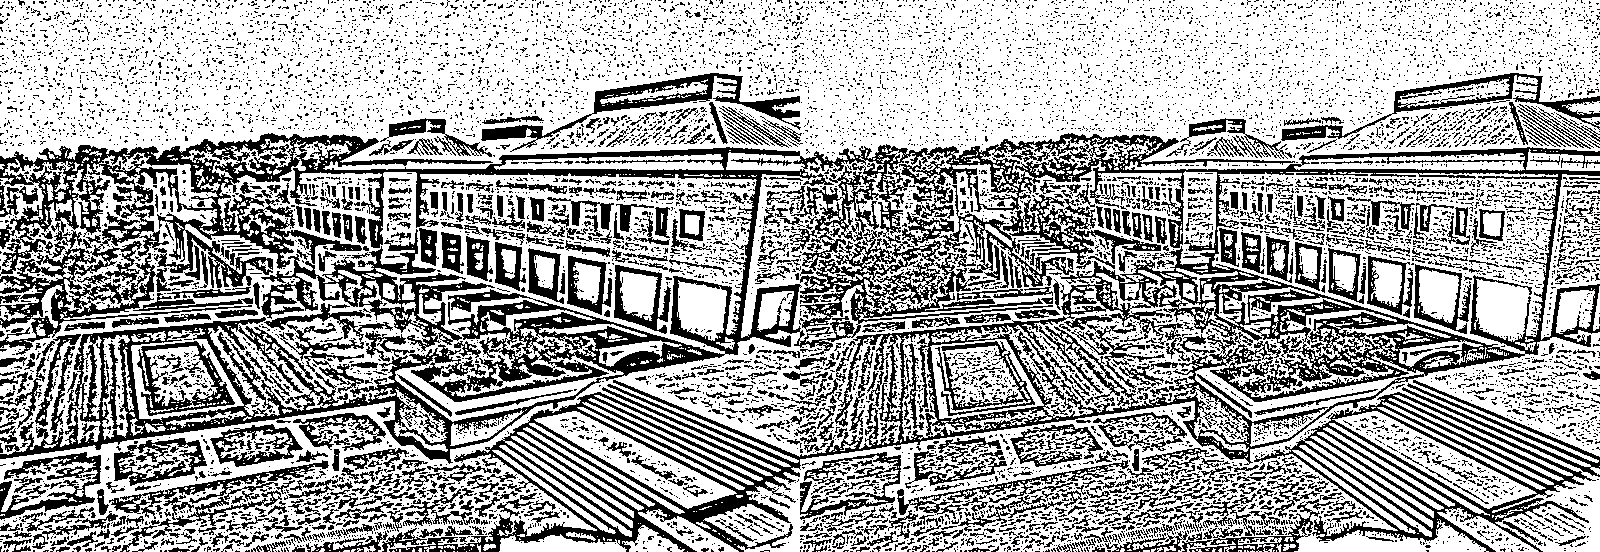

In [18]:
#Adaptive threshold
adaptive_thresh1 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
cv2.THRESH_BINARY, 11, 2)
adaptive_thresh2 = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
cv2.THRESH_BINARY, 11, 2)
#displaying the threshold images
cv2_imshow(np.hstack([adaptive_thresh1,adaptive_thresh2]))

Task 4: Read the intuition adaptive thresholding

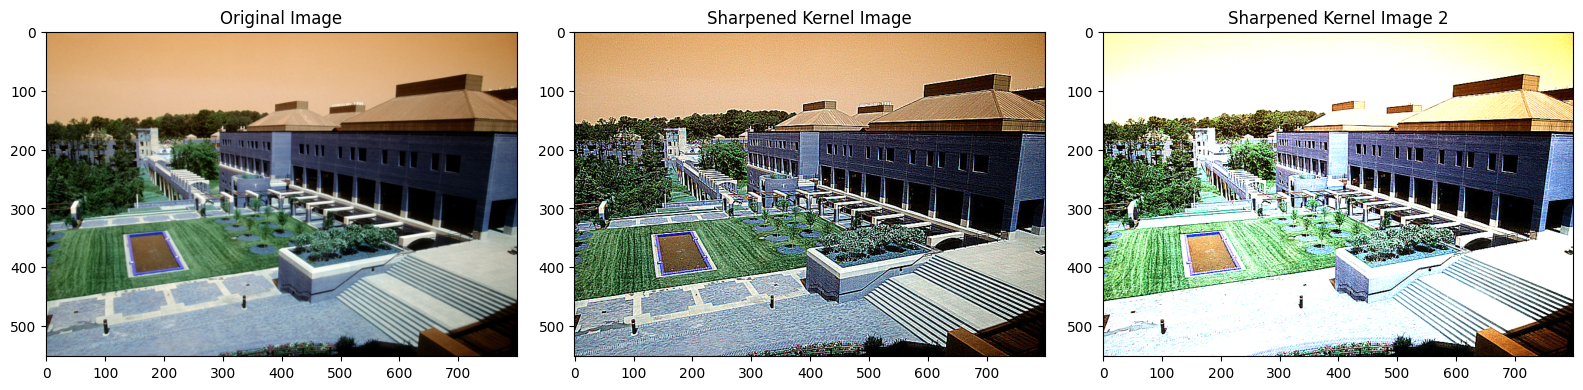

In [19]:
#Filtering
fig, ax = plt.subplots(1, 3, figsize=(16, 8))
fig.tight_layout()
# To conovolve the kernel on an image we can use cv.filter2D
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
kernel_sharpening = np.array([[-1, -1, -1],
[-1, 9, -1],
[-1, -1, -1]])
kernel_sharpening_2 = np.array([[-1, -1, -1],
[-1, 10, -1],
[-1, -1, -1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
ax[1].imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
ax[1].set_title('Sharpened Kernel Image')
sharpened_2 = cv2.filter2D(image, -1, kernel_sharpening_2)
ax[2].imshow(cv2.cvtColor(sharpened_2, cv2.COLOR_BGR2RGB))
ax[2].set_title('Sharpened Kernel Image 2')
plt.show()